# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('//datasets/usage.csv')

In [3]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
users.isnull().sum()
users.isnull().mean()

user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64

In [11]:
# cantidad de nulos para usage
usage.isnull().sum()
usage.isnull().mean()

id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- la columna city con 11.73% informacion faltante y churn_date con 88.35% de valores nulo indica clientes activos
- Indica qué harías: ¿imputar, eliminar, ignorar?
- no eliminar las columnas puede tener informacion importante 

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
print("==ESTADISTICAS DE COLUMNAS NUMERICAS - USERS ==")
users[['user_id', 'age']].describe()

==ESTADISTICAS DE COLUMNAS NUMERICAS - USERS ==


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- que los valores son positivos y que coincide con los registrois dd eusuario de users_latam.csv
- La columna `age` ...
- son valores consistente con edades de clientes adultios que van desde 18 hasta 80 añospero hay unos valore atipico <18 o extremadamente altos >100

In [13]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- Las columnas ...id identificadro unico de registro
- user_id ambas columnas gtienes valores positivos y consistente

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print("\n=== City ===")
print(users['city'].value_counts())
print("\n=== Plan ===")
print(users['plan'].value_counts())



=== City ===
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

=== Plan ===
Basico     2595
Premium    1405
Name: plan, dtype: int64


- La columna `city` ... podemos ver que las ciudades con mayor clientes son Bogota y la ciudad de Mexico
- La columna `plan` ...podemos ver que el plan basico tiene una mayor demanda que el plan premium

In [15]:
# explorar columna categórica de usage
usage['type'] # completa el código
print(usage['type'].value_counts())

text    22092
call    17908
Name: type, dtype: int64


- La columna `type` ...vemos que las personas utilizan mas los mensajes de textos que las llamadas


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?  

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] =  pd.to_datetime(users['reg_date'], errors='coerce')

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] =  pd.to_datetime(users['reg_date'], errors='coerce')

In [18]:
# Revisar los años presentes en `reg_date` de users
print("=== AÑOS EN REG_DATE ===")
years_reg = users['reg_date'].dt.year.value_counts().sort_index()
print(years_reg)
print(f"\nRango: {users['reg_date'].dt.year.min()} - {users['reg_date'].dt.year.max()}")

=== AÑOS EN REG_DATE ===
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

Rango: 2022 - 2026


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.
se observa desde el año 2022 hasta el año2026. los cuales los años validos seria del 2022 hasta 3l 2024 faltaria el año 2025 y el 2026 tiene solo 40 registro en conclusion hay fechas que deben ser corregidas

In [19]:
# Revisar los años presentes en `date` de usage
print("=== AÑOS EN DATE (USAGE) ===")
years_usage = usage['date'].dt.year.value_counts().sort_index
print(years_usage)
print(f"\nRango: {usage['date'].dt.year.min()} - {usage['date'].dt.year.max()} ")

=== AÑOS EN DATE (USAGE) ===
<bound method Series.sort_index of 2024.0    1330
2023.0    1316
2022.0    1314
2026.0      40
Name: date, dtype: int64>

Rango: 2022.0 - 2026.0 


En `date`, ... haz doble clic en este bloque y escribe qué ves. 
existen fechas futuras que necesitan ser corregidas y nuestro analisis solo lo basaremos en las fechas que aparecen que seria los años 2022 - 2023 y 2024
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- Si aparecen años imposibles en estas fechas o en ambos datasets.
- los datos fueron registrados solo hasta el 2024, por lo que podemos concluir que cualquier fecha posterior podria ser un error  podria ser que los 40 registros corresponda a los mismos usuarios de ambas tablas
- ¿Qué harías con ellas?
- podriamos marcar como nula todas las fechas >2024 en ambos datasets la razon podria ser que son errores evidente en la captura de datos.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = users['reg_date'].replace('?', pd.NA)

# Verificar cambios
users['reg_date'].describe()

count                    4000
unique                   3961
top       2026-05-10 00:00:00
freq                       40
first     2022-01-01 00:00:00
last      2026-05-10 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
print("===  ANALISIS DE NULO DE DURACION  ===")
calls = usage[usage['type'] == 'call']
texts = usage[usage['type'] == 'text']
print("\nNulos en duration:")
print(f"En llamadas (call): {calls['duration'].isnull().sum()} de {len(calls)}")
print(f"En mensajes (call): {texts['duration'].isnull().sum()} de {len(texts)}")

===  ANALISIS DE NULO DE DURACION  ===

Nulos en duration:
En llamadas (call): 0 de 17908
En mensajes (call): 22076 de 22092


In [24]:
# Verificación MAR en usage (Missing At Random) para length
print("===  ANALISIS DE NULO EN LENGTH  ===")
calls = usage[usage['type'] == 'call']
texts = usage[usage['type'] == 'text']
print("\nNulos en duration:")
print(f"En llamadas (call): {calls['length'].isnull().sum()} de {len(calls)}")
print(f"En mensajes (call): {texts['length'].isnull().sum()} de {len(texts)}")

===  ANALISIS DE NULO EN LENGTH  ===

Nulos en duration:
En llamadas (call): 17896 de 17908
En mensajes (call): 0 de 22092


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
los nulos en estas columnas si son MAR porque depende completamente de la columna 'type': en duracion de llamadas 0% nulos y los mensajes 100% nulos los mensajes no tienen duracion
en longitud las llamadas 100% nulos ya que no tienen longitud y los mensajes 0% los mensajes si tienen longitud

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg=usage_agg.rename(columns={
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
print("=== RESUMEN ESTADÍSTICO DE COLUMNAS NUMÉRICAS ===")

columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
resumen = user_profile[columnas_numericas].describe()

print(resumen.round(2))

=== RESUMEN ESTADÍSTICO DE COLUMNAS NUMÉRICAS ===
           age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  4000.00        3999.00        3999.00               3999.00
mean     48.14           5.52           4.48                 23.32
std      17.69           2.36           2.14                 18.17
min      18.00           0.00           0.00                  0.00
25%      33.00           4.00           3.00                 11.12
50%      48.00           5.00           4.00                 19.78
75%      63.00           7.00           6.00                 31.42
max      79.00          17.00          15.00                155.69


In [29]:
# Distribución porcentual del tipo de plan
print("\n=== DISTRIBUCIÓN DE PLANES (%) ===")

distribucion_plan = user_profile['plan'].value_counts(normalize=True) * 100
print(distribucion_plan.round(2))


=== DISTRIBUCIÓN DE PLANES (%) ===
Basico     64.88
Premium    35.12
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

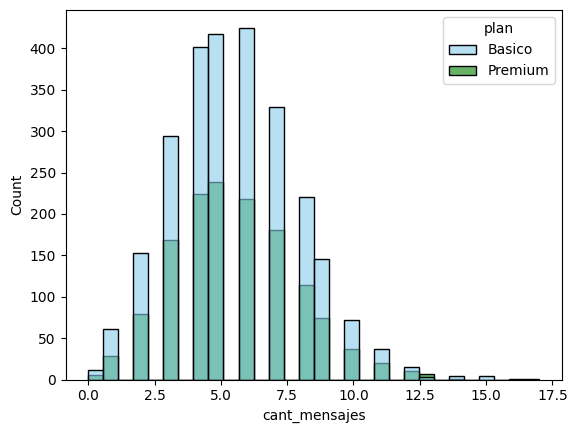

In [35]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan',
            bins=30, alpha=0.6,palette=['skyblue','green'] )

plt.show()


💡Insights: 
- Distribución ...
observamos que esta sesgada a la derecha y su mayoria de valores bajos y su simetria es normal es bimodal tiene dos picos de dos grandes grupos diferentes

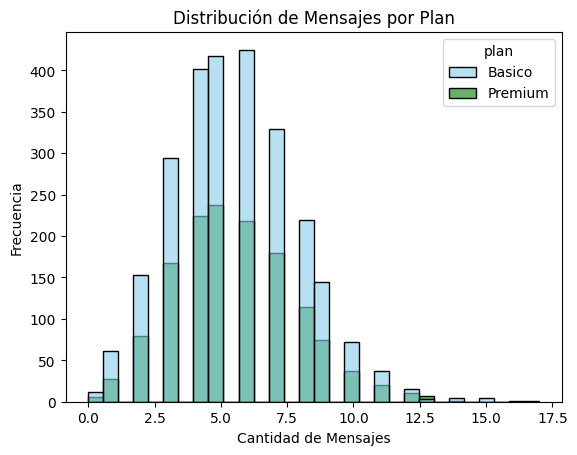

In [36]:
# Histograma para visualizar la cant_mensajes
sns.histplot(
    data=user_profile,
    x='cant_mensajes',
    hue='plan',
    bins=30,
    alpha=0.6,
    palette=['skyblue','green']
)

plt.title('Distribución de Mensajes por Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- ....tenemos una distribucion sesgada a la derecha y vemos que la mayoria de los usuarios envia entre 4 y 7 mensajes el pico mas alto es entre 5y 6 el plan basico tiene mayor frecuencia.
- su forma de distribucion entre los dos planes son bastante parecidas no podemos observar una gran diferencias entre los dos planes

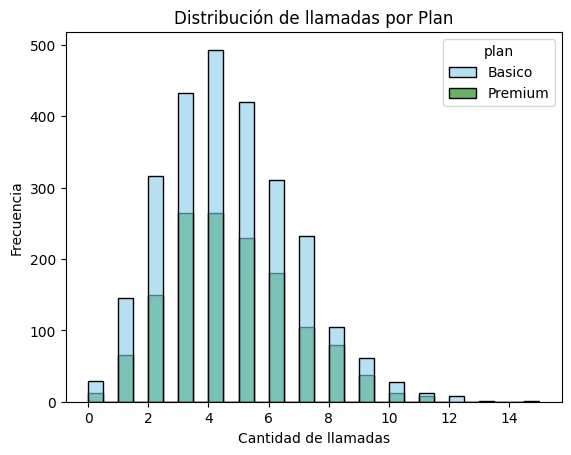

In [37]:
# Histograma para visualizar la cant_llamadas
sns.histplot(
    data=user_profile,
    x='cant_llamadas',
    hue='plan',
    bins=30,
    alpha=0.6,
    palette=['skyblue','green']
)

plt.title('Distribución de llamadas por Plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- Distribución ... vemos una doistribucion sesgada a la derecha y tieen una concentracion principal en el uso de llamada entre los dos planes que realizan entre 2 y 6 llamadas con un pico entre 3y4 llamadas.
- el plan basico muestra una mayor frecuencia 

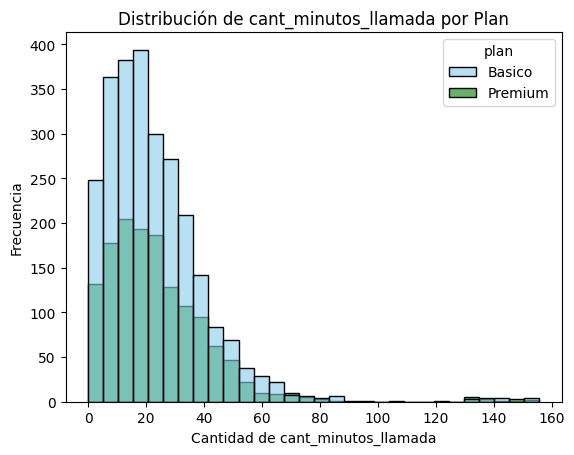

In [38]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x='cant_minutos_llamada',
    hue='plan',
    bins=30,
    alpha=0.6,
    palette=['skyblue','green']
)

plt.title('Distribución de cant_minutos_llamada por Plan')
plt.xlabel('Cantidad de cant_minutos_llamada')
plt.ylabel('Frecuencia')

plt.show()

💡Insights: 
- ...en este histogramavemos una fuerte distribucion sesgada a la derecha la mayoria de los usuarios se concentra entre 5 y 40 minutos pero existe unas llamadas que llegan hasta los 160 minutos, vuekta vemos que el plan basico son mas altos los rangos de llamadas 

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

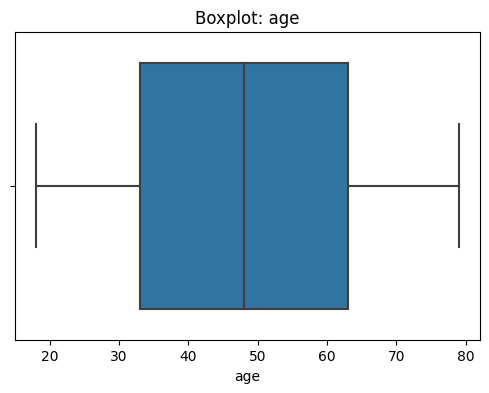

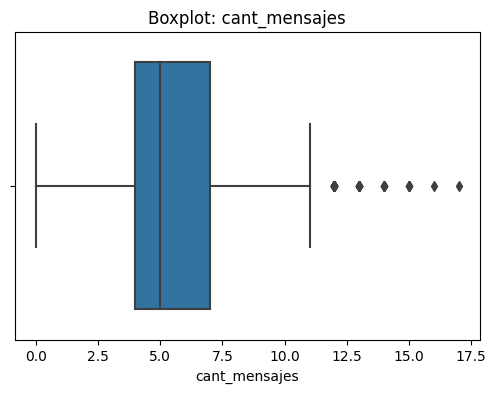

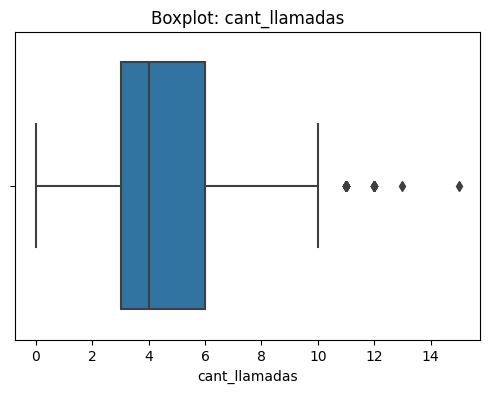

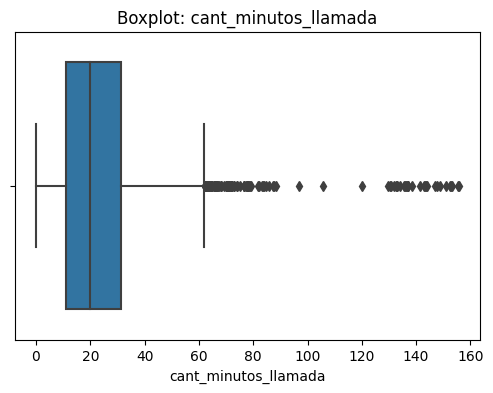

In [39]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6,4))

    sns.boxplot(data=user_profile, x=col)

    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
- Age: ...(presenta o no outliers) presenta outliers superiores corespondiente a usuarios de mayor actividad con estos valores podemos ver el comportamiento real de uso intensivo y no parece ser error de los registros
- cant_mensajes: ...observamos puntos por encima del bigote en un aproximado de 12 a 17 mensajes estos valores reflejan comportamiento reales de uao intensivo no parece ser error en el registro
- cant_llamadas: ...muestra valores atipico superiores esto nos representa a usuarios con mayor numeros de llamadass lo cual consideramos un comportamiento valido
- cant_minutos_llamada: ...presenta outliers superiores mas marcado evideciando la existencia de usuario intensivo esto no parece valores inconsistente

In [41]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IRQ = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IRQ
    limite_superior = Q3 + 1.5 * IRQ

    print(f"\nVariable: {col}")
    print(f"Limite inferior: {limite_inferior}")
    print(f"limite superior: {limite_superior}")



Variable: age
Limite inferior: -12.0
limite superior: 108.0

Variable: cant_mensajes
Limite inferior: -0.5
limite superior: 11.5

Variable: cant_llamadas
Limite inferior: -1.5
limite superior: 10.5

Variable: cant_minutos_llamada
Limite inferior: -19.322500000000005
limite superior: 61.8575


In [42]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
- se identifica algunos valores atipico por encima del limite IRQ, sin embargo esto representan a varios usuarios con una mayor actividad por lo tanto se decide mantener para conservar la variabilidad real del comportamiento
- cant_llamadas: mantener o no outliers, porqué?
- aqui se dectetan algunos outliers superiores pero no serian valores extremos por el cual se decide mantenerlos en el analisis
  
- cant_minutos_llamada: mantener o no outliers, porqué?
- aqui podemos ver una diferencia limite 61.8 y un maximo cercano a los 150 sin embargo no nos indica un error sino los ususarios que realizan llamadas largas, por lo que eliminarlos distorcionaria el analisis asi que decidimos dejarlos.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [43]:
# Crear columna grupo_uso
def clasificar_uso(row):
    if row['cant_llamadas'] <5 and row['cant_mensajes'] <5:
        return 'Bajo uso'
    elif row['cant_llamadas'] <10 and row['cant_mensajes'] <10:
        return 'Uso medio'
    else:
        return 'Alto uso'

user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)

In [44]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [52]:
# Crear columna grupo_edad
def clasificar_edad(edad):
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

user_profile['grupo_edad'] = user_profile['age'].apply(clasificar_edad)

In [53]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

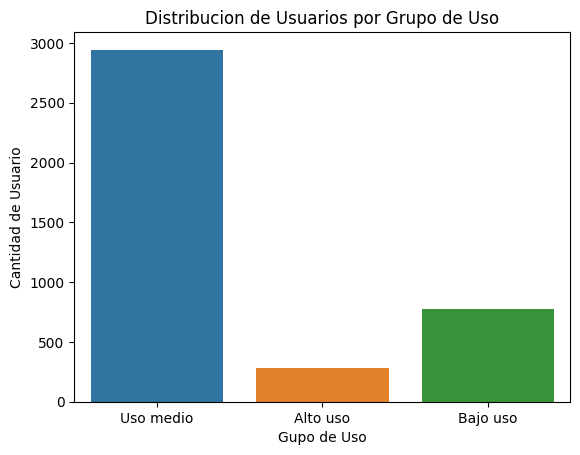

In [47]:
# Visualización de los segmentos por uso
sns.countplot(x='grupo_uso', data=user_profile)

plt.title('Distribucion de Usuarios por Grupo de Uso')
plt.xlabel('Gupo de Uso')
plt.ylabel('Cantidad de Usuario')

plt.show()

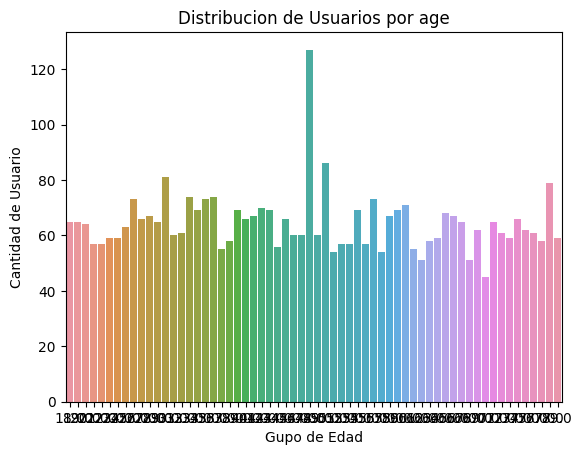

In [51]:
# Visualización de los segmentos por edad
sns.countplot(x='age', data=user_profile)

plt.title('Distribucion de Usuarios por age')
plt.xlabel('Gupo de Edad')
plt.ylabel('Cantidad de Usuario')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Se dectetaron valores invalidos en la variable age con valores -999 los cuales fueron tratados reemplazandola por la mediana para poder evitar distorsiones en nuestro analisis.
- Se detectaron valores faltantes en 'city' y un alto pocentaje de nulos en 'churn_date' por el cual explicamos porque la mayoria de los clientes permanecen activos
- Se identificaron outliers en las variables de uso como mensajes, llamadas lo cual represnta el comportamiento de los usuarios y no representa errore de captura. 


🔍 **Segmentos por Edad**
- En su gran mayoria los usuarios pertenece al grupo de Adulto que van desde 30 hasta 59 años, esto nos indica que este es nuestro principal segmento demografico de la empresa.
- Los otros dos segmentos de jovenes (<30), y los adultos mayores (>60), representa una pequeña porcion 


📊 **Segmentos por Nivel de Uso**
- La mayor parte de los usuarios se concetran en los grupos Bajos uso y su uso medio lo cual nos indica que el consumo de ellos es moderao.
- Existe un grupo reducido de Alto Uso, esta caracterizado por mayor niveles de mensajes, llamadas en especial por los minutos de las llamadas


➡️ Esto sugiere que cuenta con una base solida de sus clientes o usuarios de consumo moderado y su nicho estrategico de los usuarios intensivos que le podria represntar unos mayores ingresos con la cual estos perfiles nos permitiria diseñar una oferta diferenciada revisando su nivel de uso y edad.


💡 **Recomendaciones**
- Diseñar planes especificos para dicho nicho de mercado que seria para los usuarios de alto uso.
- enfocar campaña de marketing en el segmento Adulto, ya que nos representa  el grupo predominante.
- Implementar estrategia de fidelizacion para los usuarios intensivos ya que constituyen un segmentode alto valor potencial para la empresa.
- abc 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`